# Import software libraries

In [25]:
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import category_encoders as ce

# Load and preview the data

In [26]:
df = pd.read_pickle('users_data_final.pickle')
df.head()

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8


# Check the shape of the data

In [27]:
df.shape

(45179, 33)

# Check the data types

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null  int6

# Explore the distribution of the target variable

- You need to plot the distribution of the target column (term_deposit) and explain what is the problem of the distribution.

In [29]:
df['term_deposit'] = df['term_deposit'].replace({True: 1, False: 0})

fig = px.histogram(df,x='term_deposit')
fig.show()

# Apply oversampling or SMOTE to the target label

In [30]:
x = df.drop(columns = 'term_deposit')
x = x.drop(columns = 'user_id')
y = df['term_deposit']
sm = SMOTE()
x1, y1 = sm.fit_resample(x, y)
df1 = pd.concat([pd.DataFrame(x1), pd.Series(y1)], axis=1)
df1

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,term_deposit
0,3.000000,2143.000000,1,0,0,0,0,0,0,0,...,261,1,-1,0,0,0,0,4,8,0
1,0.000000,1369.420000,0,1,0,0,0,0,0,0,...,151,1,-1,0,1,0,1,2,7,0
2,2.000000,2.000000,0,0,1,0,0,0,0,0,...,76,1,-1,0,0,0,0,1,6,0
3,0.000000,1369.420000,0,0,0,1,0,0,0,0,...,92,1,-1,0,0,1,0,3,6,0
4,1.000000,1.000000,0,0,0,0,0,0,0,0,...,198,1,-1,0,0,0,1,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,0.000000,1369.420000,0,0,0,0,0,0,0,0,...,284,3,-1,0,0,0,0,3,6,1
79784,0.000000,1369.420000,0,0,0,0,0,0,0,0,...,741,1,-1,0,0,0,0,2,6,1
79785,3.000000,70.664378,0,0,0,0,0,0,0,0,...,265,1,-1,0,0,0,0,3,10,1
79786,17.938404,0.000000,0,0,0,0,0,0,0,0,...,154,1,-1,0,0,0,0,1,5,1


# Normalize the data

In [31]:
scaler = MinMaxScaler()
normalize = scaler.fit_transform(df1)
normalize = pd.DataFrame(normalize,columns=df1.columns)
normalize

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,term_deposit
0,0.15000,0.092259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.000000,0.0,0.0,0.0,0.0,0.0,0.666667,0.636364,0.0
1,0.00000,0.085236,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.000000,0.0,0.0,1.0,0.0,1.0,0.333333,0.545455,0.0
2,0.10000,0.072822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.015453,0.000000,0.0,0.0,0.0,0.0,0.0,0.166667,0.454545,0.0
3,0.00000,0.085236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018707,0.000000,0.0,0.0,0.0,1.0,0.0,0.500000,0.454545,0.0
4,0.05000,0.072812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040260,0.000000,0.0,0.0,0.0,0.0,1.0,0.166667,0.636364,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,0.00000,0.085236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.057747,0.032258,0.0,0.0,0.0,0.0,0.0,0.500000,0.454545,1.0
79784,0.00000,0.085236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.150671,0.000000,0.0,0.0,0.0,0.0,0.0,0.333333,0.454545,1.0
79785,0.15000,0.073445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053884,0.000000,0.0,0.0,0.0,0.0,0.0,0.500000,0.818182,1.0
79786,0.89692,0.072803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.031314,0.000000,0.0,0.0,0.0,0.0,0.0,0.166667,0.363636,1.0


# Standardlize the data

In [32]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df1)
scaled = pd.DataFrame(scaled,columns=df1.columns)
scaled

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,device_desktop,device_tablet,single,age_group_encoded,month_joined,term_deposit
0,0.030815,0.223935,2.420123,-0.345645,-0.139077,-0.388792,-0.188686,-0.277451,-0.239752,-0.144051,...,-0.335980,-0.522720,-0.489587,-0.338796,-0.473907,-0.284899,-0.526537,1.800698,0.534045,-1.0
1,-0.862020,-0.050023,-0.413202,2.893145,-0.139077,-0.388792,-0.188686,-0.277451,-0.239752,-0.144051,...,-0.653720,-0.522720,-0.489587,-0.338796,2.110120,-0.284899,1.899201,-0.012980,0.220533,-1.0
2,-0.266797,-0.534286,-0.413202,-0.345645,7.190280,-0.388792,-0.188686,-0.277451,-0.239752,-0.144051,...,-0.870360,-0.522720,-0.489587,-0.338796,-0.473907,-0.284899,-0.526537,-0.919818,-0.092979,-1.0
3,-0.862020,-0.050023,-0.413202,-0.345645,-0.139077,2.572069,-0.188686,-0.277451,-0.239752,-0.144051,...,-0.824143,-0.522720,-0.489587,-0.338796,-0.473907,3.510014,-0.526537,0.893859,-0.092979,-1.0
4,-0.564408,-0.534640,-0.413202,-0.345645,-0.139077,-0.388792,-0.188686,-0.277451,-0.239752,-0.144051,...,-0.517958,-0.522720,-0.489587,-0.338796,-0.473907,-0.284899,1.899201,-0.919818,0.534045,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79783,-0.862020,-0.050023,-0.413202,-0.345645,-0.139077,-0.388792,-0.188686,-0.277451,-0.239752,-0.144051,...,-0.269544,0.256504,-0.489587,-0.338796,-0.473907,-0.284899,-0.526537,0.893859,-0.092979,1.0
79784,-0.862020,-0.050023,-0.413202,-0.345645,-0.139077,-0.388792,-0.188686,-0.277451,-0.239752,-0.144051,...,1.050519,-0.522720,-0.489587,-0.338796,-0.473907,-0.284899,-0.526537,-0.012980,-0.092979,1.0
79785,0.030815,-0.509969,-0.413202,-0.345645,-0.139077,-0.388792,-0.188686,-0.277451,-0.239752,-0.144051,...,-0.324426,-0.522720,-0.489587,-0.338796,-0.473907,-0.284899,-0.526537,0.893859,1.161069,1.0
79786,4.476657,-0.534994,-0.413202,-0.345645,-0.139077,-0.388792,-0.188686,-0.277451,-0.239752,-0.144051,...,-0.645054,-0.522720,-0.489587,-0.338796,-0.473907,-0.284899,-0.526537,-0.919818,-0.406491,1.0


# Plot the PCA

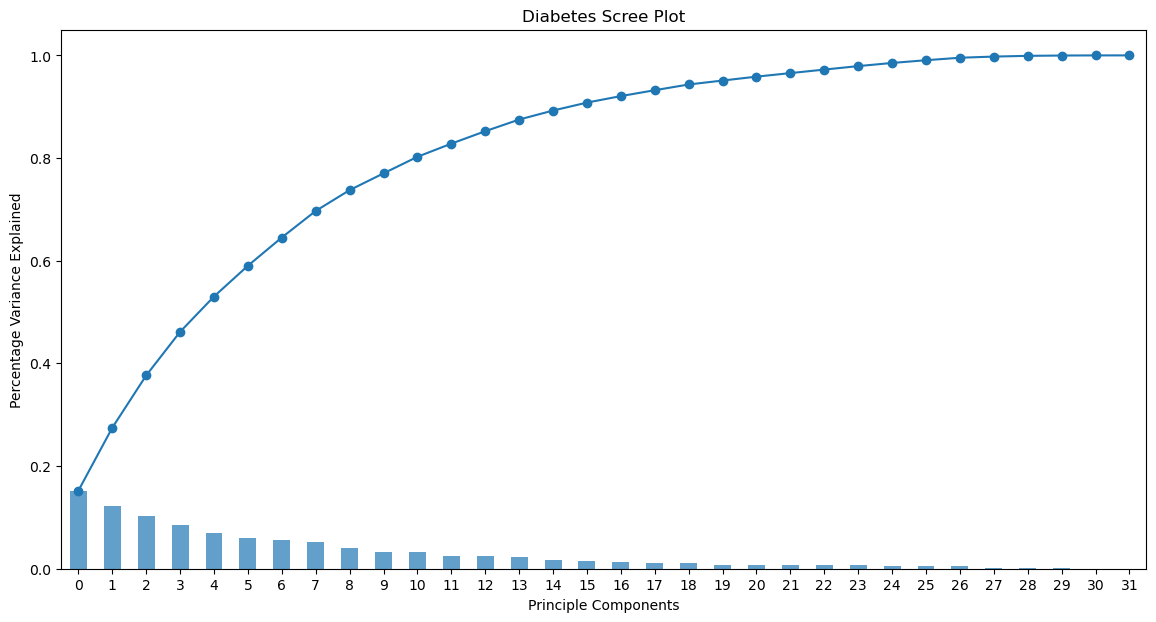

In [34]:
pca = PCA()
pca.fit(normalize)
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7)
total = 0
lst = []
for i in exp_var:
    total = total+i
    lst.append(total)
pd.Series(lst).plot(marker="o")
plt.xlabel("Principle Components")
plt.ylabel("Percentage Variance Explained")
plt.title("Diabetes Scree Plot")
plt.show()